In [33]:
import json
from PIL import Image

import torch
from torchvision import transforms

from pytorch_pretrained_vit import ViT

In [34]:
model_name = 'B_16_imagenet1k'
model = ViT(model_name, pretrained=True)

Loaded pretrained weights.


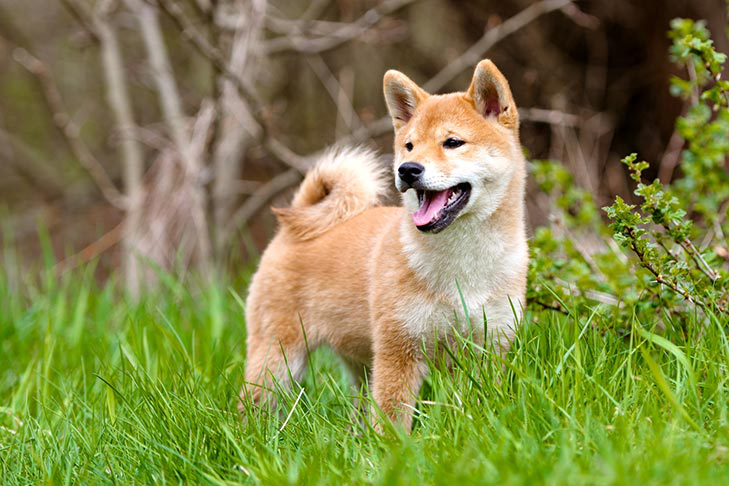

In [35]:
# Open image
img = Image.open('img3.jpg')
img

In [36]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(model.image_size), transforms.ToTensor(), transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]),])
img = tfms(img).unsqueeze(0)

In [37]:
# Load class names
labels_map = json.load(open('labels_map.txt'))
labels_map = [labels_map[str(i)] for i in range(1000)]

In [38]:
# Classify
model.eval()
with torch.no_grad():
    outputs = model(img).squeeze(0)
print('-----')
for idx in torch.topk(outputs, k=3).indices.tolist():
    prob = torch.softmax(outputs, -1)[idx].item()
    print('[{idx}] {label:<75} ({p:.2f}%)'.format(idx=idx, label=labels_map[idx], p=prob*100))

-----
[273] dingo, warrigal, warragal, Canis dingo                                      (36.65%)
[274] dhole, Cuon alpinus                                                         (14.39%)
[248] Eskimo dog, husky                                                           (8.83%)
